In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from sklearn.datasets import load_digits

In [3]:
dg=load_digits()
dg

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'frame': None,
 'feature_names': ['pixel_0_0',
  'pixel_0_1',
  'pixel_0_2',
  'pixel_0_3',
  'pixel_0_4',
  'pixel_0_5',
  'pixel_0_6',
  'pixel_0_7',
  'pixel_1_0',
  'pixel_1_1',
  'pixel_1_2',
  'pixel_1_3',
  'pixel_1_4',
  'pixel_1_5',
  'pixel_1_6',
  'pixel_1_7',
  'pixel_2_0',
  'pixel_2_1',
  'pixel_2_2',
  'pixel_2_3',
  'pixel_2_4',
  'pixel_2_5',
  'pixel_2_6',
  'pixel_2_7',
  'pixel_3_0',
  'pixel_3_1',
  'pixel_3_2',
  'pixel_3_3',
  'pixel_3_4',
  'pixel_3_5',
  'pixel_3_6',
  'pixel_3_7',
  'pixel_4_0',
  'pixel_4_1',
  'pixel_4_2',
  'pixel_4_3',
  'pixel_4_4',
  'pixel_4_5',
  'pixel_4_6',
  'pixel_4_7',
  'pixel_5_0',
  'pixel_5_1',
 

In [4]:
df=pd.DataFrame(dg.data,columns=dg.feature_names)

In [5]:
df['Target']=dg.target
df.head()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,Target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4


In [10]:
from sklearn.model_selection import train_test_split
X=df.drop('Target',axis=1)
y=df['Target']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

In [13]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()

In [35]:
k=range(1,15)
params={'n_neighbors':[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15],'weights' : ['uniform', 'distance'],'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute']}
gcv=GridSearchCV(knn,params,cv=5)
gcv.fit(X_train,y_train)


GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15],
                         'weights': ['uniform', 'distance']})

In [36]:
result=pd.DataFrame(gcv.cv_results_)
result

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_algorithm,param_n_neighbors,param_weights,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.004790,0.002311,0.022081,0.006746,auto,1,uniform,"{'algorithm': 'auto', 'n_neighbors': 1, 'weigh...",0.976190,0.988095,0.984064,0.984064,0.988048,0.984092,0.004338,1
1,0.005997,0.003739,0.013992,0.001999,auto,1,distance,"{'algorithm': 'auto', 'n_neighbors': 1, 'weigh...",0.976190,0.988095,0.984064,0.984064,0.988048,0.984092,0.004338,1
2,0.005439,0.003216,0.024285,0.008487,auto,2,uniform,"{'algorithm': 'auto', 'n_neighbors': 2, 'weigh...",0.968254,0.988095,0.976096,0.980080,0.980080,0.978521,0.006447,49
3,0.003351,0.002234,0.010537,0.002025,auto,2,distance,"{'algorithm': 'auto', 'n_neighbors': 2, 'weigh...",0.976190,0.988095,0.984064,0.984064,0.988048,0.984092,0.004338,1
4,0.004585,0.003914,0.026006,0.007239,auto,3,uniform,"{'algorithm': 'auto', 'n_neighbors': 3, 'weigh...",0.976190,0.988095,0.972112,0.984064,0.984064,0.980905,0.005852,41
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,0.003945,0.001045,0.014493,0.002704,brute,13,distance,"{'algorithm': 'brute', 'n_neighbors': 13, 'wei...",0.972222,0.976190,0.972112,0.976096,0.984064,0.976137,0.004344,77
116,0.004688,0.002450,0.022347,0.002071,brute,14,uniform,"{'algorithm': 'brute', 'n_neighbors': 14, 'wei...",0.960317,0.980159,0.972112,0.972112,0.980080,0.972956,0.007263,109
117,0.001999,0.002448,0.012934,0.002664,brute,14,distance,"{'algorithm': 'brute', 'n_neighbors': 14, 'wei...",0.964286,0.980159,0.976096,0.976096,0.980080,0.975343,0.005814,93
118,0.004996,0.000004,0.021480,0.003701,brute,15,uniform,"{'algorithm': 'brute', 'n_neighbors': 15, 'wei...",0.960317,0.980159,0.964143,0.976096,0.976096,0.971362,0.007698,117


In [37]:
res=[]
res.append({'Best Parameters':gcv.best_params_,'Best Score':gcv.best_score_})
best_results=pd.DataFrame(res)
best_results

,Best Parameters,Best Score
0,"{'algorithm': 'auto', 'n_neighbors': 1, 'weigh...",0.984092


In [38]:
res

[{'Best Parameters': {'algorithm': 'auto',
   'n_neighbors': 1,
   'weights': 'uniform'},
  'Best Score': 0.984092202618099}]

In [39]:
gcv.score(X_test,y_test)

0.9888888888888889

In [40]:
y_pred=gcv.predict(X_test)
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_pred,y_test)

In [41]:
cm

array([[45,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 52,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 53,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 54,  0,  0,  0,  0,  1,  2],
       [ 0,  0,  0,  0, 48,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 55,  0,  0,  0,  1],
       [ 0,  0,  0,  0,  0,  1, 60,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 53,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0, 60,  0],
       [ 0,  0,  0,  0,  0,  1,  0,  0,  0, 54]], dtype=int64)

Text(33.0, 0.5, 'Predicted')

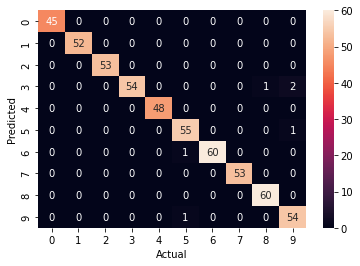

In [45]:
sns.heatmap(cm,annot=True)
plt.xlabel('Actual')
plt.ylabel('Predicted')

In [48]:
from sklearn.metrics import classification_report
C_report=classification_report(y_pred,y_test)
print(C_report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        45
           1       1.00      1.00      1.00        52
           2       1.00      1.00      1.00        53
           3       1.00      0.95      0.97        57
           4       1.00      1.00      1.00        48
           5       0.96      0.98      0.97        56
           6       1.00      0.98      0.99        61
           7       1.00      1.00      1.00        53
           8       0.98      1.00      0.99        60
           9       0.95      0.98      0.96        55

    accuracy                           0.99       540
   macro avg       0.99      0.99      0.99       540
weighted avg       0.99      0.99      0.99       540

